In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [64]:
savefig = input("save figures? ")
if "no" in savefig or "n" in savefig:
    savefig = False
    print(" ### NOT SAVING FIGURES ### ")
else:
    savefig = True
    print(" ### SAVING FIGURES ### ")

save figures? y
 ### SAVING FIGURES ### 


In [65]:
df = pd.read_csv("48_Industry_Portfolios_daily.CSV")
dates = pd.to_datetime(df.iloc[:, 0], format='%Y%m%d', errors='coerce')
df.iloc[:, 0] = dates

C:\Users\Ubaid\miniconda3\envs\msc\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,11,15,20,26,27,33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [66]:
df=df.rename(columns = {'Unnamed: 0':'Date'})
df = df[df['Date'] > '2000-01-01']

In [67]:
df.replace(' NaN', np.nan, inplace=True)

In [68]:
df.dropna(inplace=True)
df.drop('Date', axis=1, inplace=True)
df

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
19612,-3.41,-2.37,-0.52,-1.16,1.67,-0.57,-1.65,-2.55,-2.75,-2.37,...,-2.16,-0.85,-1.33,-2.57,-2.12,-4.60,-3.07,-2.11,-4.11,-0.72
19613,-2.68,-2.27,-2.19,-1.11,0.64,-3.03,0.40,-2.75,-2.10,-3.59,...,-1.59,-2.57,-2.59,-3.46,-1.82,-3.85,-3.61,-1.58,-4.55,-2.00
19614,3.00,-0.03,1.12,1.33,-0.41,-2.17,-0.19,-2.20,-1.42,1.92,...,1.18,0.31,2.27,-0.97,1.19,-0.38,0.32,1.07,-2.27,0.06
19615,0.24,0.99,3.69,1.29,-1.28,0.03,-1.87,0.27,2.69,-0.44,...,1.87,3.06,3.72,-0.14,-0.73,4.00,2.38,-0.56,1.92,-0.30
19616,2.77,1.18,1.49,5.25,2.75,0.71,0.81,-1.27,5.40,1.09,...,-1.05,1.12,2.71,4.79,1.50,1.18,4.27,1.64,1.43,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24094,-0.19,-0.16,-0.62,-0.59,-1.06,0.72,-0.92,-0.34,-0.27,1.12,...,-0.56,-1.73,-0.45,0.00,-0.68,-0.20,-0.02,-1.24,-0.81,-0.79
24095,0.01,-0.20,0.45,0.26,1.30,0.37,0.17,0.18,0.40,1.45,...,0.29,0.91,-0.48,0.03,1.08,0.76,0.99,1.06,0.70,0.04
24096,0.09,0.12,-0.32,-0.36,-1.10,-1.20,1.04,-0.54,-0.59,-0.57,...,-0.09,-0.26,-1.46,2.79,0.19,0.29,0.32,-0.04,-0.12,-0.55
24097,-0.35,-1.88,-0.39,-0.44,-1.24,1.38,-0.79,-0.56,-1.03,-1.14,...,-0.85,-1.17,-0.36,-0.45,0.20,-0.58,-0.58,-0.68,-0.81,-0.58


In [69]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Agric'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.224569
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [70]:
for i in range(48):
    columns = df.columns
    result=adfuller(df[columns[i]])
    print(columns[i])
    print('ADF Statistic: %f' % result[0])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

Agric
ADF Statistic: -16.224569
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Food 
ADF Statistic: -17.535058
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Soda 
ADF Statistic: -14.671591
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Beer 
ADF Statistic: -16.188986
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Smoke
ADF Statistic: -12.769512
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Toys 
ADF Statistic: -12.829547
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Fun  
ADF Statistic: -15.238543
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Books
ADF Statistic: -13.873743
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Hshld
ADF Statistic: -15.411471
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Clths
ADF Statistic: -32.934685
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Hlth 
ADF Statistic: -20.664049
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
MedEq
ADF Statistic: -13.873135
Critical Values:
	1%: 

In [71]:
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
from sklearn.preprocessing import StandardScaler

In [72]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Agric,Food,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,MedEq,Drugs,Chems,Txtls,BldMt,Cnstr,Steel,Mach,ElcEq,Autos,Aero,Ships,Mines,Coal,Oil,Util,Telcm,BusSv,Comps,Chips,LabEq,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,1.000000,0.444189,0.355602,0.292449,0.402220,0.424952,0.465892,0.420416,0.463811,0.475574,0.447134,0.632905,0.433368,0.541085,0.541971,0.553119,0.580044,0.556939,0.507320,0.490139,0.432989,0.583537,0.442043,0.523636,0.469678,0.486260,0.467189,0.404726,0.414993,0.493148,0.511311,0.526925,0.548187,0.446397,0.445907,0.468404,0.503286,0.475967,0.513580,0.441760
Food,0.444189,1.000000,0.685309,0.498323,0.486347,0.445328,0.546369,0.701742,0.574382,0.608015,0.621382,0.628769,0.507470,0.638427,0.533292,0.500036,0.552398,0.578787,0.555591,0.586175,0.501118,0.507970,0.359219,0.538357,0.612427,0.585802,0.493213,0.373986,0.390619,0.478125,0.564731,0.587176,0.652543,0.602177,0.594879,0.557618,0.656613,0.530401,0.526305,0.539588
Beer,0.355602,0.685309,1.000000,0.423927,0.362828,0.336285,0.399613,0.630118,0.445549,0.489263,0.508532,0.494245,0.381527,0.486082,0.383796,0.361659,0.413472,0.437450,0.433611,0.468308,0.375874,0.377976,0.256514,0.426368,0.517858,0.466771,0.379832,0.292448,0.291323,0.361708,0.422259,0.440122,0.509090,0.499289,0.494325,0.425980,0.524698,0.405535,0.390084,0.430010
Smoke,0.292449,0.498323,0.423927,1.000000,0.291057,0.272865,0.323687,0.443270,0.328009,0.365228,0.404155,0.385408,0.281732,0.376086,0.325226,0.284952,0.316902,0.327548,0.332925,0.361451,0.308429,0.304193,0.213197,0.353733,0.419251,0.368401,0.278553,0.199848,0.215895,0.269226,0.335038,0.334693,0.392345,0.346274,0.366362,0.319051,0.419731,0.308389,0.310369,0.324571
Toys,0.402220,0.486347,0.362828,0.291057,1.000000,0.599678,0.629332,0.515129,0.683518,0.552991,0.500529,0.614168,0.628113,0.677009,0.633173,0.594624,0.662632,0.659386,0.649211,0.603996,0.500015,0.533912,0.397101,0.468245,0.461330,0.603651,0.612827,0.533926,0.548069,0.621790,0.619003,0.670527,0.669807,0.656645,0.618622,0.593212,0.612982,0.625423,0.642937,0.578639
Fun,0.424952,0.445328,0.336285,0.272865,0.599678,1.000000,0.663797,0.448477,0.650214,0.553257,0.481650,0.622821,0.631942,0.670765,0.646404,0.638924,0.688895,0.664184,0.673432,0.598254,0.510942,0.577152,0.442734,0.465039,0.430418,0.654909,0.670563,0.599486,0.588615,0.649079,0.606508,0.663479,0.645526,0.627314,0.614196,0.627606,0.626603,0.655135,0.691526,0.613766
Books,0.465892,0.546369,0.399613,0.323687,0.629332,0.663797,1.000000,0.560372,0.680678,0.628315,0.560167,0.674042,0.663373,0.739919,0.672139,0.652476,0.719945,0.709223,0.697677,0.645540,0.586820,0.589912,0.466341,0.552970,0.532347,0.707488,0.674483,0.569946,0.578102,0.657053,0.653992,0.697063,0.724214,0.646884,0.624268,0.687118,0.701911,0.698340,0.716251,0.636510
Hshld,0.420416,0.701742,0.630118,0.443270,0.515129,0.448477,0.560372,1.000000,0.578005,0.581535,0.600483,0.629723,0.526803,0.669321,0.525844,0.488215,0.562534,0.601085,0.575758,0.608770,0.496175,0.481220,0.310580,0.484015,0.558307,0.582010,0.496320,0.410389,0.422447,0.503638,0.559760,0.596608,0.616044,0.632602,0.607315,0.571747,0.640513,0.513535,0.541443,0.547382
Clths,0.463811,0.574382,0.445549,0.328009,0.683518,0.650214,0.680678,0.578005,1.000000,0.601525,0.543109,0.694173,0.710830,0.742666,0.694940,0.641455,0.713717,0.716126,0.727096,0.666049,0.557049,0.581803,0.413828,0.503222,0.511273,0.670697,0.675443,0.590160,0.595821,0.662669,0.664517,0.736174,0.719751,0.780466,0.714133,0.671277,0.686014,0.689918,0.706559,0.624288
MedEq,0.475574,0.608015,0.489263,0.365228,0.552991,0.553257,0.628315,0.581535,0.601525,1.000000,0.755315,0.641807,0.560409,0.650573,0.590372,0.575194,0.634932,0.644730,0.607538,0.626072,0.554235,0.529288,0.400591,0.538286,0.555155,0.639218,0.619706,0.506508,0.514529,0.658339,0.593808,0.629736,0.741895,0.622569,0.591505,0.591657,0.688410,0.575825,0.629300,0.594001


In [73]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
pd.DataFrame(df_std)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-2.068781,-2.452935,-0.403501,-1.097657,1.089907,-0.394867,-0.857583,-1.675642,-2.549451,-1.546250,...,-1.503139,-0.624217,-1.130751,-1.977123,-1.741510,-2.402509,-2.097644,-1.124929,-2.049334,-0.496190
1,-1.632565,-2.351207,-1.575781,-1.051902,0.382876,-2.008232,0.172097,-1.806264,-1.952918,-2.324409,...,-1.115524,-1.819014,-2.173078,-2.652467,-1.501019,-2.013972,-2.461491,-0.848394,-2.266476,-1.352568
2,1.761550,-0.072493,0.747721,1.180942,-0.337883,-1.444210,-0.124250,-1.447054,-1.328852,1.190064,...,0.768150,0.181576,1.847328,-0.763021,0.911902,-0.216338,0.186502,0.534279,-1.141283,0.025666
3,0.112297,0.965135,2.551770,1.144338,-0.935083,-0.001364,-0.968085,0.166126,2.443073,-0.315228,...,1.237368,2.091863,3.046832,-0.133206,-0.627237,2.052722,1.574508,-0.316195,0.926505,-0.215191
4,1.624112,1.158419,1.007448,4.768132,1.831259,0.444607,0.378033,-0.839662,4.930158,0.660661,...,-0.748310,0.744243,2.211315,3.607745,1.160409,0.591821,2.847970,0.831684,0.684687,0.380260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,-0.144652,-0.204740,-0.473697,-0.576050,-0.784067,0.451165,-0.490916,-0.232271,-0.273447,0.679796,...,-0.415097,-1.235508,-0.402776,-0.026972,-0.587155,-0.123089,-0.042587,-0.670995,-0.420765,-0.543023
4483,-0.025141,-0.245431,0.277405,0.201785,0.835925,0.221622,0.056572,0.107346,0.341441,0.890282,...,0.162926,0.598366,-0.427593,-0.004208,0.823722,0.374240,0.637941,0.529061,0.324428,0.012285
4484,0.022664,0.080099,-0.263108,-0.365577,-0.811524,-0.808046,0.493558,-0.362893,-0.567125,-0.398146,...,-0.095484,-0.214374,-1.238292,2.090118,0.110267,0.130756,0.186502,-0.044878,-0.080247,-0.382452
4485,-0.240261,-1.954466,-0.312245,-0.438785,-0.907625,0.884019,-0.425619,-0.375955,-0.970933,-0.761712,...,-0.612304,-0.846505,-0.328324,-0.368438,0.118284,-0.319948,-0.419909,-0.378807,-0.420765,-0.402523


In [74]:
pca = PCA(n_components=48)
principalComponents = pca.fit_transform(df_std)
print(principalComponents)

[[ -8.37734611   3.25733454  -0.57151155 ...   0.92794422  -0.37706609
    0.92385966]
 [-11.24223796  -1.22890733   1.46688498 ...   0.18394729   0.05139054
   -0.1091094 ]
 [  3.29914117  -2.83040692   2.23549218 ...  -0.17080871  -0.38391733
    0.4604771 ]
 ...
 [  0.32332688   0.7533125   -0.70206521 ...   1.46708858  -0.55866701
    0.22392124]
 [ -2.97253794   1.30358137   0.74412562 ...   0.68028425  -0.08171734
    0.51074626]
 [  0.93082984  -1.16884306   0.1560249  ...  -0.14071852   0.27084744
    0.21038277]]


In [75]:
plt.figure(figsize = (10,8))
plt.plot(range(1,49), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xticks(range(1,49), rotation = 90 )
plt.title('Explained Variance by Principle Components')
plt.xlabel('Number of principle components')
plt.ylabel('Cumulative Explained Variance')
if savefig: plt.savefig("cumvariance.jpg")

In [76]:
pca.components_.shape

(48, 48)

# Bootstrapping


In [77]:
from sklearn.utils import resample
def bootstrap(data):
    # prepare bootstrap sample
    boot = resample(data, replace=True, n_samples=len(data))
    boot = scaler.fit_transform(boot)
    return boot

In [78]:
df_bs = bootstrap(df)

# PCA with K-means clustering

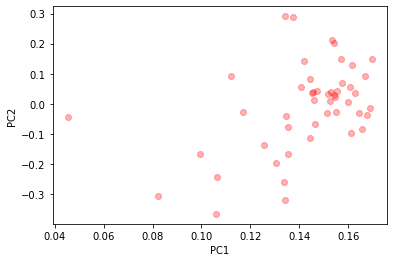

In [79]:
%matplotlib inline
pca = PCA(n_components=48)
principalComponents = pca.fit_transform(df_std)
coefficients = pd.DataFrame(pca.components_)
PCA_components = pd.DataFrame(principalComponents)
plt.scatter(coefficients.iloc[0,:], coefficients.iloc[1,:], alpha=.3, color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

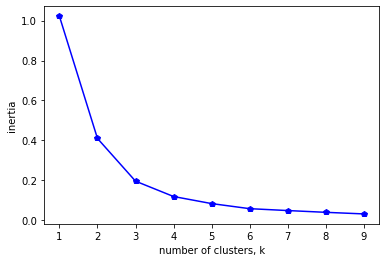

In [80]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(coefficients.iloc[:2, :].transpose())
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='blue')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
if savefig: plt.savefig("elbow.jpg")
plt.show()

In [100]:
%matplotlib inline
model = KMeans(n_clusters=3)
model.fit(coefficients.iloc[:2,:].transpose())

labels = model.predict(coefficients.iloc[:2,:].transpose())
centers = model.cluster_centers_

In [82]:
%matplotlib qt
plt.scatter(coefficients.iloc[0,:], coefficients.iloc[1, :], c=labels)

In [83]:
plus_x = []
plus_y = []
x_x = []
x_y = []
star_x = []
star_y = []

for i in range(len(coefficients.iloc[0,:])):
    if labels[i] == 0:
        plus_x.append(coefficients.iloc[0, i])
        plus_y.append(coefficients.iloc[1, i])
    elif labels[i] == 1:
        x_x.append(coefficients.iloc[0, i])
        x_y.append(coefficients.iloc[1, i])
    else:
        star_x.append(coefficients.iloc[0, i])
        star_y.append(coefficients.iloc[1, i])
        

In [84]:
%matplotlib qt
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(plus_x, plus_y, c = 'maroon', marker = 'o', label = '1')
ax.scatter(x_x, x_y, c = 'lime', marker = 'o', label = '2')
ax.scatter(star_x, star_y, c = 'cyan', marker = 'o', label = '3')

# Plotting centers

ax.scatter(centers[0][0], centers[0][1], marker='x', c='lime')
ax.scatter(centers[1][0], centers[1][1], marker='x', c='maroon')
ax.scatter(centers[2][0], centers[2][1], marker='x', c='cyan')

for i, txt in enumerate(np.array(df.columns)):
    plt.annotate(txt, (coefficients.iloc[0,:][i], coefficients.iloc[1,:][i]))
    

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("K-means Clustering")
    
if savefig: plt.savefig("K-means.jpg")
    
plt.legend()
plt.show()

In [85]:
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([28, 11,  9], dtype=int64))

## Hierarchical Clustering

In [86]:
from sklearn.cluster import AgglomerativeClustering

In [87]:
clustering = AgglomerativeClustering(n_clusters=3).fit(coefficients.iloc[:2,:].transpose())
clustering.labels_

array([0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0], dtype=int64)

In [88]:
labels = clustering.labels_
plus_x = []
plus_y = []
x_x = []
x_y = []
star_x = []
star_y = []

for i in range(len(coefficients.iloc[0,:])):
    if labels[i] == 0:
        plus_x.append(coefficients.iloc[0, i])
        plus_y.append(coefficients.iloc[1, i])
    elif labels[i] == 1:
        x_x.append(coefficients.iloc[0, i])
        x_y.append(coefficients.iloc[1, i])
    else:
        star_x.append(coefficients.iloc[0, i])
        star_y.append(coefficients.iloc[1, i])
        

In [89]:
%matplotlib qt
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(plus_x, plus_y, c = 'maroon', marker = 'o', label = '1')
ax.scatter(x_x, x_y, c = 'lime', marker = 'o', label = '2')
ax.scatter(star_x, star_y, c = 'cyan', marker = 'o', label = '3')


ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Hierarchical Clustering")

if savefig: plt.savefig("hierarchical.jpg")

for i, txt in enumerate(np.array(df.columns)):
    ax.annotate(txt, (coefficients.iloc[0,:][i], coefficients.iloc[1,:][i]))
    
plt.legend()
plt.show()

In [90]:
%matplotlib qt
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(coefficients.iloc[0,:], coefficients.iloc[1, :], c=clustering.labels_)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Hierarchical Clustering")
for i, txt in enumerate(np.array(df.columns)):
    ax.annotate(txt, (coefficients.iloc[0,:][i], coefficients.iloc[1,:][i]))

In [91]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_std)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [103]:
from sklearn.metrics import jaccard_score

for i in range(10):
    df_bs = bootstrap(df)
    scaler = StandardScaler()
    df_bs = scaler.fit_transform(df_bs)
    principalComponents = pca.fit_transform(df_bs)
    coefficients = pd.DataFrame(pca.components_)
    model = KMeans(n_clusters=3)
    model.fit(coefficients.iloc[:2,:].transpose())
    labels_bs = model.predict(coefficients.iloc[:2,:].transpose())
    print(labels_bs)
    
    

[2 0 0 0 0 1 1 2 0 2 0 2 0 2 2 2 2 1 1 1 1 1 1 2 2 0 2 1 1 2 0 2 2 1 1 1 1
 2 2 2 2 2 2 2 2 2 1 2]
[2 1 1 1 1 2 0 2 1 2 2 2 1 2 2 2 2 2 0 2 0 0 2 2 2 1 2 2 2 2 1 2 2 0 0 0 0
 2 2 2 2 2 2 2 2 2 0 2]
[0 1 1 1 1 0 2 0 1 0 1 1 1 0 0 0 0 0 2 0 2 0 0 0 0 1 1 0 0 1 1 0 0 2 2 2 2
 0 0 0 0 0 0 0 0 0 2 0]
[0 1 1 1 1 0 2 0 1 0 1 1 1 0 0 0 0 0 2 0 2 0 0 0 0 1 1 0 0 1 1 0 0 2 2 2 2
 0 0 0 0 0 0 0 0 0 2 0]
[0 2 2 2 2 0 1 0 2 0 2 0 2 0 0 0 0 1 1 1 1 1 0 0 0 2 0 1 1 0 2 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0]
[0 1 1 1 1 0 2 0 1 0 1 1 1 0 0 0 0 0 2 0 2 0 0 0 0 1 0 0 0 0 1 0 0 2 2 2 2
 0 0 0 0 0 0 0 1 0 2 0]
[2 1 1 1 1 2 0 2 1 2 1 1 1 2 2 2 2 0 0 0 0 0 2 2 2 1 2 0 0 2 1 2 2 0 0 0 0
 2 2 2 2 2 2 2 1 2 0 2]
[0 2 2 2 2 0 1 0 2 0 0 0 2 0 0 0 0 1 1 1 1 1 0 0 0 2 0 1 1 0 2 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0]
[2 0 0 0 0 2 1 2 0 2 0 2 0 2 2 2 2 1 1 1 1 1 2 2 2 0 2 1 1 2 0 2 2 1 1 1 1
 2 2 2 2 2 2 2 2 2 1 2]
[1 2 2 2 2 1 0 1 2 1 2 2 2 1 1 1 1 0 0 0 0 0 1 1 1 2 1 0 0 1 2 1 1 0 0 0 0
 1 1 1 1 1 1 1 1 1 0 1]


In [ ]:
def flip_labels(a,b):
    

In [101]:
map(flip_labels(, labels_bs)

array([1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1])

In [ ]:
def flip_labels(df, a, b):
    for i in range(len(df)

In [ ]:
def fix_labels(labels_bs):
    
    if labels_bs[0] == 2:
        if labels_bs[1] == 1:
            #flip ones and twos
        elif labels_bs[1] == 0
            # flip zeros and twos
            # flip ones and zeros
    elif labels_bs[0] == 0:
        if labels_bs[1] == 1:
            #flip zeros and ones
            #flip zeros and twos
            